# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

•	product — объём запасов в скважине (тыс. баррелей).

Условия задачи:

•	Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

•	При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

•	Бюджет на разработку скважин в регионе — 10 млрд рублей.

•	При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. 
рублей, поскольку объём указан в тысячах баррелей.

•	После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.


## Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df2.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df3.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [7]:
df1.shape

(100000, 5)

In [8]:
df2.shape

(100000, 5)

In [9]:
df3.shape    

(100000, 5)

In [10]:
df1.isna().sum().sum()

0

In [11]:
df2.isna().sum().sum()

0

In [12]:
df3.isna().sum().sum()

0

In [13]:
df1.duplicated().sum()

0

In [14]:
df2.duplicated().sum()

0

In [15]:
df3.duplicated().sum()

0

In [16]:
data1 = df1.drop('id', axis=1)

In [17]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<Figure size 432x288 with 0 Axes>

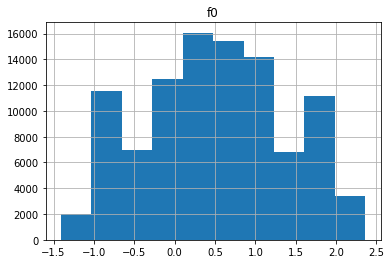

<Figure size 432x288 with 0 Axes>

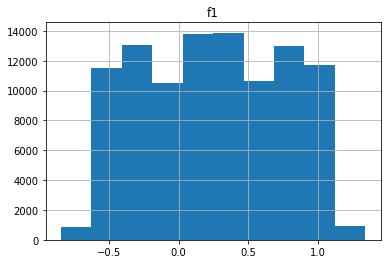

<Figure size 432x288 with 0 Axes>

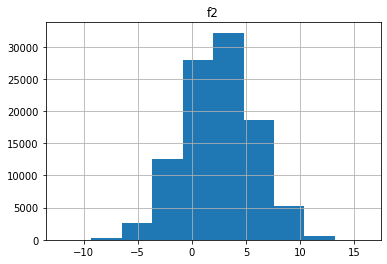

<Figure size 432x288 with 0 Axes>

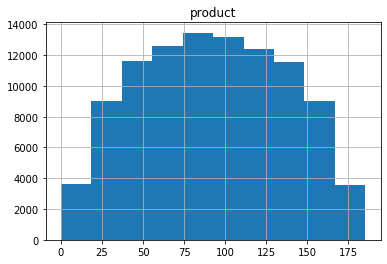

In [18]:
for column in data1:
    plt.figure()
    data1.hist([column])

In [19]:
data2 = df2.drop('id', axis=1)

In [20]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<Figure size 432x288 with 0 Axes>

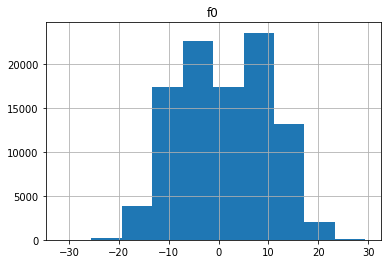

<Figure size 432x288 with 0 Axes>

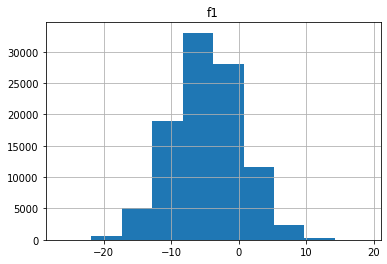

<Figure size 432x288 with 0 Axes>

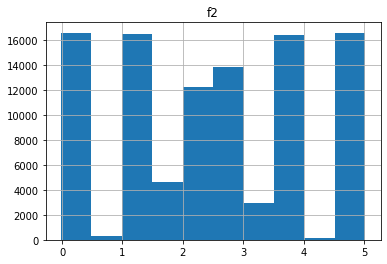

<Figure size 432x288 with 0 Axes>

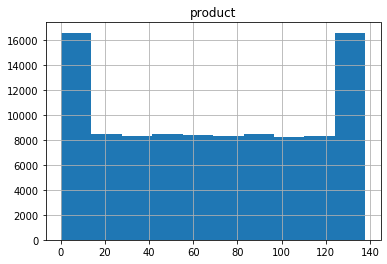

In [21]:
for column in data2:
    plt.figure()
    data2.hist([column])

In [22]:
data3 = df3.drop('id', axis=1)

In [23]:
data3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<Figure size 432x288 with 0 Axes>

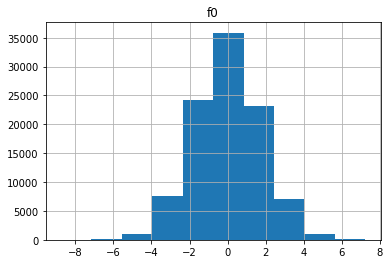

<Figure size 432x288 with 0 Axes>

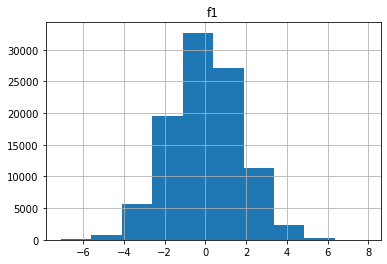

<Figure size 432x288 with 0 Axes>

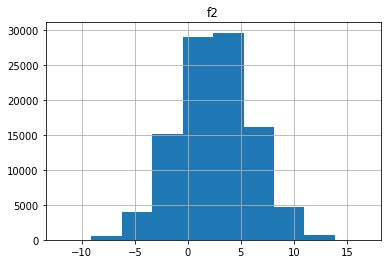

<Figure size 432x288 with 0 Axes>

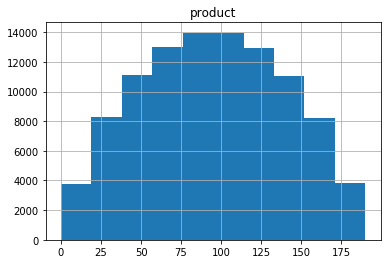

In [24]:
for column in data3:
    plt.figure()
    data3.hist([column])

In [25]:
#plt.matshow(data1.corr())
#plt.show()


In [26]:
#plt.hist(data3['product'], alpha = 0.3 )

ВЫВОД:

   
Результаты первичной обработки:

Пропуски - отсутствуют

Типы столбцов - корректны

Названия столбцов - корректны

Дубликаты - отсутствуют

Объем запасов - положительный

Удален столбец id, т.к. не несет информации для обучения модели

## Обучение и проверка модели

### Разделим выборки

In [27]:
train_1, valid_1 = train_test_split(data1, test_size=0.25, random_state=12345)
train_2, valid_2 = train_test_split(data2, test_size=0.25, random_state=12345)
train_3, valid_3 = train_test_split(data3, test_size=0.25, random_state=12345)

In [28]:
print(train_1.shape, valid_1.shape)
print(train_2.shape, valid_2.shape)
print(train_3.shape, valid_3.shape)

(75000, 4) (25000, 4)
(75000, 4) (25000, 4)
(75000, 4) (25000, 4)


### Разделим каждую выборку на features - признаки и target — целевой признак

In [29]:
features1 = data1.drop(['product'], axis=1)
target1 = data1['product']

features2 = data2.drop(['product'], axis=1)
target2 = data2['product']

features3 = data3.drop(['product'], axis=1)
target3 = data3['product']

In [30]:
train_features_1, features_valid_1, train_target_1, target_valid_1 = train_test_split(
    features1, target1, test_size=0.25, random_state=12345)


In [31]:
train_features_2, features_valid_2, train_target_2, target_valid_2 = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)

In [32]:
train_features_3, features_valid_3, train_target_3, target_valid_3 = train_test_split(
    features3, target3, test_size=0.25, random_state=12345)

In [33]:
scaler = StandardScaler()
scaler.fit(train_features_1)
#data1 = scaler.transform(data1)
features_train_scaled1 = scaler.transform(train_features_1)
features_valid_scaled1 = scaler.transform(features_valid_1)

In [34]:
model1 = LinearRegression().fit(features_train_scaled1, train_target_1)
predicted_valid_1 = model1.predict(features_valid_scaled1) 
mse_1 = mean_squared_error(target_valid_1, predicted_valid_1)
rmse_1 = mse_1 ** 0.5
print('Cредний запас сырья в регионе тыс. баррелей', df1['product'].mean())
print('RMSE модели {:.2f}'.format(rmse_1))

Cредний запас сырья в регионе тыс. баррелей 92.50000000000001
RMSE модели 37.58


In [35]:
scaler = StandardScaler()
scaler.fit(train_features_2)
features_train_scaled2 = scaler.transform(train_features_2)
features_valid_scaled2 = scaler.transform(features_valid_2)

In [36]:
model2 = LinearRegression().fit(features_train_scaled2, train_target_2)
predicted_valid_2 = model2.predict(features_valid_scaled2) 
mse_2 = mean_squared_error(target_valid_2, predicted_valid_2)
rmse_2 = mse_2 ** 0.5
print('Cредний запас сырья в регионе тыс. баррелей', df2['product'].mean())
print('RMSE модели {:.2f}'.format(rmse_2))

Cредний запас сырья в регионе тыс. баррелей 68.82500000000002
RMSE модели 0.89


In [37]:
scaler = StandardScaler()
scaler.fit(train_features_3)
features_train_scaled3 = scaler.transform(train_features_3)
features_valid_scaled3 = scaler.transform(features_valid_3)

In [38]:
model3 = LinearRegression().fit(features_train_scaled3, train_target_3)
predicted_valid_3 = model3.predict(features_valid_scaled3) 
mse_3 = mean_squared_error(target_valid_3, predicted_valid_3)
rmse_3 = mse_3 ** 0.5
print('Cредний запас сырья в регионе тыс. баррелей', df3['product'].mean())
print('RMSE модели {:.2f}'.format(rmse_3))

Cредний запас сырья в регионе тыс. баррелей 95.00000000000004
RMSE модели 40.03


Вывод:
    
    

После обучения модели Линейнойрегресси в трех регионах полакало, что во втором регионе лучшая RMSE, модель предсказывает наличие запасов с точностью 0.89 тыс. бареллей, в тоже время там самый низкий средний показатель остатков запасов.

## Подготовка к расчёту прибыли

In [39]:
# Сбросим индексы целевого признака в валидационной выборке для каждого региона:
valid_1=target_valid_1.reset_index(drop=True, inplace=True)
valid_2=target_valid_2.reset_index(drop=True, inplace=True)
valid_3=target_valid_3.reset_index(drop=True, inplace=True)

# Переведем предсказания в валидационной выборке в pd.Series:
predicted_valid_1 = pd.Series(predicted_valid_1)
predicted_valid_2 = pd.Series(predicted_valid_2)
predicted_valid_3 = pd.Series(predicted_valid_3)

Чтобы рассчитать минимальный средний объём сырья в месторождениях региона, достаточный для его разработки, необходимо провести рассчеты:

Операционная прибыль = Валовая прибыль - Операционные расходы(себестоимость добычи, зарплаты, аренда и пр. связанное с деятельность по добычи)
Один баррель сырья приносит 4500 рублей прибыли.
Бюджет на разработку месторождений — 10 млрд рублей, стоимость бурения одной скважины — 50 млн рублей.
Минимальный средний объём сырья в месторождениях региона, достаточный для его разработки - объем баррелей в скважине, при котором операционная прибыль = 0

In [40]:
#x = 50000000 / 4500 / 1000
#print('Минимальный средний объём сырья {:.3f} тыс.баррелей', x)

budget = 10**10 
income_per_barrel = 450 * 10**3
n = budget / income_per_barrel
print("Точка безубыточности: {0:.0f} тыс. баррелей".format(n))

Точка безубыточности: 22222 тыс. баррелей


In [41]:
print("Средний объем нефти в скважине для безубыточного функционирования:", np.ceil(n/200))

Средний объем нефти в скважине для безубыточного функционирования: 112.0


Напишем функцию для расчёта прибыли по набору отобранных месторождений и предсказаний модели distribution_revenue, принимающая на вход предсказания, истинные значения целевого признака и количество скважин и считающая общую прибыль в млрд.руб в регионе:

In [42]:
def profit_1(predictions, target):
    top_preds = predictions.sort_values(ascending=False)
    top_target = target[top_preds.index][:200]
    revenue = top_target.sum() * income_per_barrel
    return revenue - budget

## Расчёт прибыли и рисков 

In [43]:
state = np.random.RandomState(12345)

def distribution_revenue(probabilities,target):
    revenue = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        revenue.append(profit_1(probs_subsample, target_subsample))

    revenue = pd.Series(revenue)
    mean = revenue.mean()
    print('Средняя прибыль {} млрд.руб.'.format(mean))
    
    lower = np.quantile(revenue, 0.025)
    upper = np.quantile(revenue, 0.975)
    print('95%-й доверительный интервал {} - {} млрд.руб.'.format(lower, upper))
    
    loss_risk = st.percentileofscore(revenue, 0)
    print('Риск убытков {} %'.format(loss_risk))
    return


In [44]:
distribution_revenue(predicted_valid_1,target_valid_1)

Средняя прибыль 425938526.9105923 млрд.руб.
95%-й доверительный интервал -102090094.83793654 - 947976353.358369 млрд.руб.
Риск убытков 6.0 %


In [47]:
distribution_revenue(predicted_valid_2,target_valid_2)

Средняя прибыль 511289691.3937345 млрд.руб.
95%-й доверительный интервал 104449974.93630745 - 949374063.4377563 млрд.руб.
Риск убытков 1.2 %


In [48]:
distribution_revenue(predicted_valid_3, target_valid_3)

Средняя прибыль 421354856.0077551 млрд.руб.
95%-й доверительный интервал -112733613.64124078 - 993287806.0494142 млрд.руб.
Риск убытков 6.6 %


Полученные данные показывают:

при Bootstrap с 1000 выборок, распределение средних прибылей стремиться к нормальному со средним в районе 104 млрд. для регионов 1 и 3, и в районе 105 млрд. для региона 1. Что предполагает такое же среднее в генеральной совокупности для данной модели и региона.
95% доверительный интервал только для региона 2 выше 100 млрд.рублей, операционная прибыль меньше 10 млрд. ни в одном из регионов.
Риски получения убытков отстутствуют во всех 3 регионах.
Наиболее предпочтительным регионом для бурения скважин по доверительному интервалу и среднему - Регион 2.

Общий вывод:


Обучение модели Линейная регрессия в 3 регионах показала, что в регионе 2 лучшая RMSE, модель предсказывает наличие запасов нефти с точность до 0.9 тыс.баррелей, в то время как в регионе 1 и 3 достигается разброс около 40 тыс.баррелей.
В общем все регионы подходят по среднему количеству баррелей в скважинах
Однако, на случайной выборке из 1000 повторений модель предсказывает среднюю прибыль и 95%-й доверительный интервал операционного дохода лучше в Регионе 2.
Следовательно, чтобы получить максимальную прибыль при минимальных рисках необходимо использовать Регион 2 для добычи сырья, т.к. статистически это лучший регион по заданным входным данным.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован